需求：统计每天数据，绘制概率密度图片

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [26]:
df=pd.read_csv("F:\\BWMProject\\11.5\\Sorted_table.csv")
df

,Unnamed: 0,User_id,Venue_id,UTC_time,Time_offset,Latitude,Longitude,Venue_category_name,Country,street_info,POI_id,POI_name,POI_type
0,0,16,4b058814f964a52080b022e3,2012-04-04 13:31:37,480,1.300642,103.844898,Multiplex,SG,"68 Orchard Rd, Singapore 238839",40,"Plaza Singapura, Singapore",mall_POI
1,1,16,4b058814f964a52081b022e3,2012-04-05 11:04:35,480,1.290441,103.859124,Multiplex,SG,"Marina Square, 04-100, 6, Raffles Blvd, Singap...",6365,"Multiplex Marina Square, 04-100, 6, Raffles Bl...",Independent POI
2,2,16,4b058814f964a52087b022e3,2012-04-11 10:54:56,480,1.298915,103.847644,Multiplex,SG,"Handy Rd, Handy Road Open Space, Singapore",426,"Multiplex Handy Rd, Handy Road Open Space, Sin...",Independent POI
3,3,16,4b058814f964a52080b022e3,2012-04-11 13:18:37,480,1.300642,103.844898,Multiplex,SG,"68 Orchard Rd, Singapore 238839",40,"Plaza Singapura, Singapore",mall_POI
4,4,16,4ccac71fc4d06dcb72fd6403,2012-04-12 11:10:02,480,1.264806,103.824513,Other Nightlife,SG,"3 Sentosa Gateway, Singapore 098544",4759,"Other Nightlife 3 Sentosa Gateway, Singapore 0...",Independent POI
5,5,16,4ccac71fc4d06dcb72fd6403,2012-04-13 10:14:03,480,1.264806,103.824513,Other Nightlife,SG,"3 Sentosa Gateway, Singapore 098544",4759,"Other Nightlife 3 Sentosa Gateway, Singapore 0...",Independent POI
6,6,16,4cdd032bd549548190ef44b2,2012-04-20 11:13:34,480,1.350452,103.872254,Multiplex,SG,"Serangoon, Singapore",104,"NEX, Singapore",mall_POI
7,7,16,4b058814f964a52087b022e3,2012-04-21 09:52:29,480,1.298915,103.847644,Multiplex,SG,"Handy Rd, Handy Road Open Space, Singapore",426,"Multiplex Handy Rd, Handy Road Open Space, Sin...",Independent POI
8,8,16,4ba45ce3f964a520a59838e3,2012-04-22 05:31:10,480,1.356363,103.944526,Library,SG,"31 Tampines Ave 7, Singapore 529620",3156,"Library 31 Tampines Ave 7, Singapore 529620",Independent POI
9,9,16,4b1baa07f964a52084fc23e3,2012-04-22 07:30:39,480,1.356170,103.987033,Airport Terminal,SG,"65 Airport Blvd, Singapore 819663",3454,"Airport Terminal 65 Airport Blvd, Singapore 81...",Independent POI


In [21]:
User_16=df.loc[df.User_id==16]
User_16.drop(['Unnamed: 0','Venue_id','Time_offset','Venue_category_name','Country','street_info','POI_id','POI_name'],axis=1,inplace=True)

In [22]:
User_16.to_csv("F:\\BWMProject\\11.6\\User16.txt",index=False,sep=',')

In [23]:
User_73=df.loc[df.User_id==73]
User_73.drop(['Unnamed: 0','Venue_id','Time_offset','Venue_category_name','Country','street_info','POI_id','POI_name'],axis=1,inplace=True)
User_73.to_csv("F:\\BWMProject\\11.6\\User73.txt",index=False,sep=',')

In [24]:
User_126=df.loc[df.User_id==126]
User_126.drop(['Unnamed: 0','Venue_id','Time_offset','Venue_category_name','Country','street_info','POI_id','POI_name'],axis=1,inplace=True)
User_126.to_csv("F:\\BWMProject\\11.6\\User126.txt",index=False,sep=',')

In [28]:
active_list=[73,377,848,322,143,248,16,2391]
for i in range(len(active_list)):
    User_choose=df.loc[df.User_id==active_list[i]]
    User_choose.drop(['Unnamed: 0','Venue_id','Time_offset','Venue_category_name','Country','street_info','POI_id','POI_name'],axis=1,inplace=True)
    User_choose.to_csv("F:\\BWMProject\\11.6\\User"+str(active_list[i])+".txt",index=False,sep=',',header=False)

In [3]:
myData={} #存放读取的数据
with open("F:\\BWMProject\\11.6\\jsonData\\CDF.json",'r',encoding='utf-8') as json_file:
    myData=json.load(json_file)
myData

{'0': 0.06959628039163121,
 '1': 0.13455620776256083,
 '2': 0.19371205928742594,
 '3': 0.25562274987212613,
 '4': 0.3167374153195367,
 '5': 0.3828255931949719,
 '6': 0.4452708047912819,
 '7': 0.4891788277049641,
 '8': 0.5268699600836155,
 '9': 0.5552324672996491,
 '10': 0.5837627318793265,
 '11': 0.608878640704844,
 '12': 0.6248271030112446,
 '13': 0.6372164777203417,
 '14': 0.6485039168055049,
 '15': 0.6622468631840017,
 '16': 0.6811705516750243,
 '17': 0.7080215979382289,
 '18': 0.7428789466153305,
 '19': 0.7855501701421496,
 '20': 0.8323265150381317,
 '21': 0.8826455007310603,
 '22': 0.9376107075249046,
 '23': 1.0}

In [4]:
numList=[]
for key,value in myData.items():
    numList.append(value)

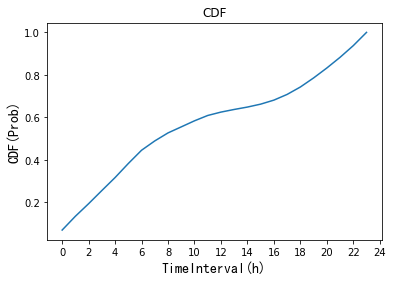

In [16]:
plt.plot(numList)
plt.xlabel(u'TimeInterval(h)',fontproperties='SimHei',fontsize=14)
plt.ylabel(u'CDF(Prob)',fontproperties='SimHei',fontsize=14)
plt.title("CDF")
plt.xticks(range(0,26,2))
# plt.xticks([0,48,96,144,192,242,290],['00:00','04:00','08:00','12:00','16:00','20:00','24:00'])
plt.savefig("F:\\BWMProject\\11.6\\CDF.png")

In [18]:
TimeDelta={} #存放读取的数据
with open("F:\\BWMProject\\11.6\\jsonData\\StaticDelta.json",'r',encoding='utf-8') as json_file:
    TimeDelta=json.load(json_file)
TimeDelta

{'1': 46389,
 '7': 28162,
 '2': 74511,
 '0': 99867,
 '3': 74514,
 '9': 17346,
 '14': 11392,
 '6': 40840,
 '10': 23638,
 '4': 40477,
 '15': 3418,
 '18': 9815,
 '12': 23497,
 '11': 10939,
 '5': 26016,
 '8': 22566,
 '13': 11595,
 '17': 38083,
 '20': 507,
 '19': 410,
 '16': 2097,
 '21': 1356,
 '29': 14,
 '34': 2,
 '22': 50,
 '25': 376,
 '23': 2,
 '26': 86,
 '24': 44,
 '28': 10,
 '30': 2}

In [27]:
DeltaList=[]
for key,values in TimeDelta.items():
    DeltaList.append(int(key))
DeltaList.sort()
DeltaList

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 34]

In [43]:
ValueList=[]
for i in range(len(DeltaList)):
    ValueList.append(TimeDelta[str(DeltaList[i])])
ValueList
sum_V=sum(ValueList)
for i in range(len(ValueList)):
    ValueList[i]/=sum_V
ValueList  

[0.16424926112749394,
 0.07629506217712875,
 0.1225467541417155,
 0.12255168818182267,
 0.06657171380593763,
 0.042787995809355266,
 0.06716873265890487,
 0.04631747916601565,
 0.03711384968611282,
 0.028528619899641623,
 0.03887694668440728,
 0.017991154910767884,
 0.03864504679937042,
 0.01907006501420181,
 0.018736194966950153,
 0.005621516362099336,
 0.0034488940349099786,
 0.06263434980041807,
 0.01614253455061585,
 0.0006743188146462047,
 0.0008338527781112824,
 0.002230186128439643,
 8.223400178612252e-05,
 3.2893600714449006e-06,
 7.236592157178781e-05,
 0.0006183996934316414,
 0.00014144248307213072,
 1.6446800357224504e-05,
 2.3025520500114307e-05,
 3.2893600714449006e-06,
 3.2893600714449006e-06]

In [45]:
for i in range(len(ValueList)):
    if i != 0:
        ValueList[i]+=ValueList[i-1]
ValueList

[0.16424926112749394,
 0.2405443233046227,
 0.3630910774463382,
 0.48564276562816083,
 0.5522144794340984,
 0.5950024752434536,
 0.6621712079023585,
 0.7084886870683742,
 0.7456025367544871,
 0.7741311566541287,
 0.813008103338536,
 0.8309992582493039,
 0.8696443050486743,
 0.8887143700628761,
 0.9074505650298262,
 0.9130720813919255,
 0.9165209754268355,
 0.9791553252272536,
 0.9952978597778694,
 0.9959721785925156,
 0.996806031370627,
 0.9990362174990666,
 0.9991184515008527,
 0.9991217408609241,
 0.9991941067824959,
 0.9998125064759276,
 0.9999539489589997,
 0.9999703957593569,
 0.999993421279857,
 0.9999967106399285,
 0.9999999999999999]

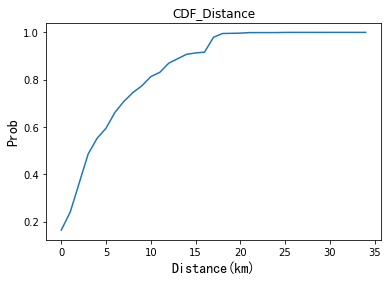

In [47]:
plt.plot(DeltaList,ValueList)
plt.xlabel(u'Distance(km)',fontproperties='SimHei',fontsize=14)
plt.ylabel(u'Prob',fontproperties='SimHei',fontsize=14)
plt.title("CDF_Distance")
# plt.xticks(DeltaList,2)
plt.savefig("F:\\BWMProject\\11.6\\Distance.png")